In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# pre-processing

df = pd.read_csv('./cybersecurity_extraction.csv')
labelEncoder = LabelEncoder()

df = df.dropna(subset=['tld'])

# create a new column having category by alphaMountains.ai
df['categories_alpha_mountain'] = df['categories_alpha_mountain'].apply(
    lambda x: x.replace(' (alphaMountain.ai)', '') if isinstance(x, str) else x
)

# drop columns that are not needed
df=df.drop(columns=['extracted_from','data_extracted','domain'])

# 0-> F and 1-> T
df['is_onion'] = labelEncoder.fit_transform(df['is_onion'])
df['white_list'] = labelEncoder.fit_transform(df['white_list'])


cols = ['categories_sophos', 'categories_webroot', 'categories_alpha_mountain',"tld"]
df[cols] = df[cols].fillna('unknown')
df_encoded = pd.get_dummies(df, columns=cols, prefix=cols)

df_encoded['malicious_label'] = ((df_encoded['last_analysis_stats_malicious'] > 0) | (df_encoded['total_votes_malicious'] > 0)).astype(int)

# print(df_encoded.head())
print(df_encoded['malicious_label'].value_counts())


malicious_label
1    2250
0    1866
Name: count, dtype: int64


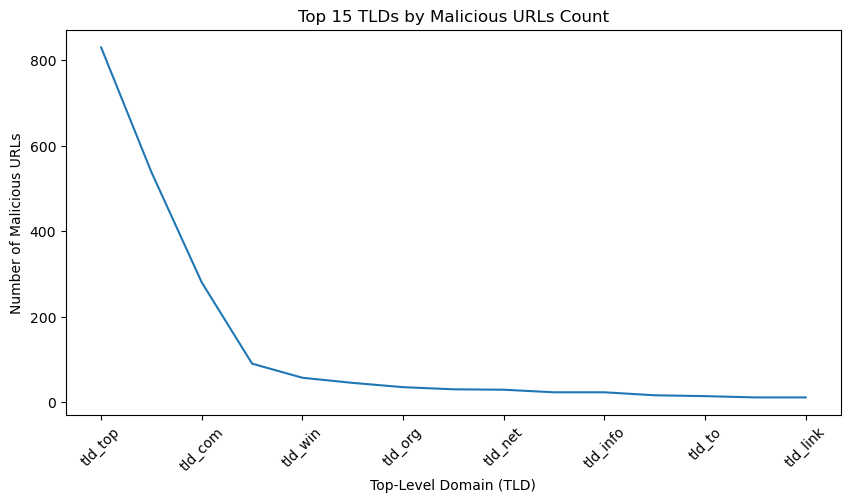

In [3]:
# Plotting the top 10 TLDs by malicious URLs count
tld_cols = [col for col in df_encoded.columns if col.startswith('tld_')]

tld_malicious_counts = df_encoded[tld_cols].multiply(df_encoded['malicious_label'], axis=0).sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,5))
tld_malicious_counts.plot(kind='line')
plt.title('Top 15 TLDs by Malicious URLs Count')
plt.xlabel('Top-Level Domain (TLD)')
plt.ylabel('Number of Malicious URLs')
plt.xticks(rotation=45)
plt.show()

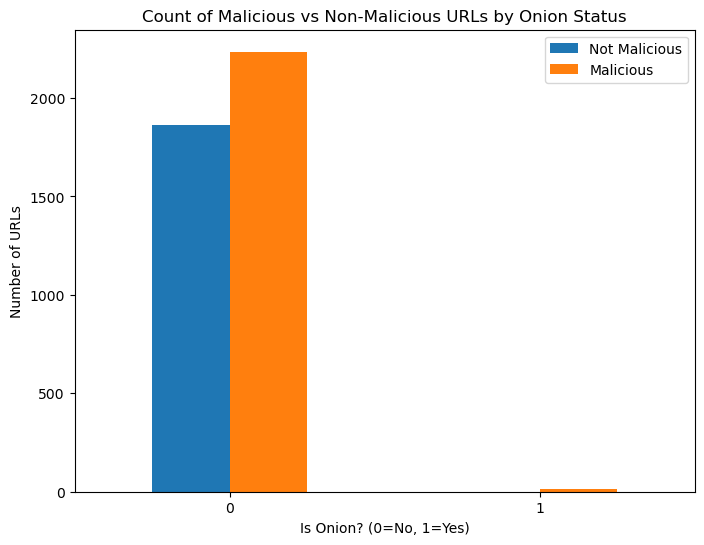

In [4]:
# Group by onion status and malicious label, count occurrences
onion_malicious_counts = df_encoded.groupby(['is_onion', 'malicious_label']).size().unstack()

# Plotting
onion_malicious_counts.plot(kind='bar',figsize=(8,6))
plt.title('Count of Malicious vs Non-Malicious URLs by Onion Status')
plt.xlabel('Is Onion? (0=No, 1=Yes)')
plt.ylabel('Number of URLs')
plt.xticks(rotation=0)
plt.legend(['Not Malicious', 'Malicious'])
plt.show()


In [5]:
X = df_encoded.drop(columns=['malicious_label',
                             'number_of_tags',
                             'reputation',
                             'total_votes_harmless',
                             'total_votes_malicious',
                             'last_analysis_stats_undetected',
                             ])
print(X.columns.tolist())
y = df_encoded['malicious_label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


['white_list', 'is_onion', 'last_analysis_stats_harmles', 'last_analysis_stats_malicious', 'last_analysis_stats_suspicious', 'categories_sophos_advertisements', 'categories_sophos_anonymizers', 'categories_sophos_auctions and classified ads', 'categories_sophos_blogs and forums', 'categories_sophos_business cloud apps', 'categories_sophos_business networking', 'categories_sophos_command and control', 'categories_sophos_content delivery', 'categories_sophos_crl and ocsp', 'categories_sophos_download freeware and shareware', 'categories_sophos_dynamic dns and isp sites', 'categories_sophos_educational institutions', 'categories_sophos_entertainment', 'categories_sophos_extreme', 'categories_sophos_financial services', 'categories_sophos_gambling', 'categories_sophos_games', 'categories_sophos_general business', 'categories_sophos_government', 'categories_sophos_health and medicines', 'categories_sophos_information technology', 'categories_sophos_intellectual piracy', 'categories_sophos_j

In [8]:
y_pred = logreg.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix values
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[357   4]
 [ 33 430]]


In [10]:
my_test_cols = ['white_list', 'is_onion', 'last_analysis_stats_harmles', 'last_analysis_stats_malicious', 'last_analysis_stats_suspicious', 'categories_sophos_advertisements', 'categories_sophos_anonymizers', 'categories_sophos_auctions and classified ads', 'categories_sophos_blogs and forums', 'categories_sophos_business cloud apps', 'categories_sophos_business networking', 'categories_sophos_command and control', 'categories_sophos_content delivery', 'categories_sophos_crl and ocsp', 'categories_sophos_download freeware and shareware', 'categories_sophos_dynamic dns and isp sites', 'categories_sophos_educational institutions', 'categories_sophos_entertainment', 'categories_sophos_extreme', 'categories_sophos_financial services', 'categories_sophos_gambling', 'categories_sophos_games', 'categories_sophos_general business', 'categories_sophos_government', 'categories_sophos_health and medicines', 'categories_sophos_information technology', 'categories_sophos_intellectual piracy', 'categories_sophos_job search', 'categories_sophos_news', 'categories_sophos_ngos and non profits', 'categories_sophos_online chat', 'categories_sophos_online shopping', 'categories_sophos_peer to peer and torrents', 'categories_sophos_personal network storage', 'categories_sophos_personal sites', 'categories_sophos_personals and dating', 'categories_sophos_phishing and fraud', 'categories_sophos_photo galleries', 'categories_sophos_portal sites', 'categories_sophos_radio and audio hosting', 'categories_sophos_real estate', 'categories_sophos_reference', 'categories_sophos_restaurants and dining', 'categories_sophos_search engines', 'categories_sophos_sexually explicit', 'categories_sophos_social networks', 'categories_sophos_society and culture', 'categories_sophos_software updates', 'categories_sophos_spam urls', 'categories_sophos_sports', 'categories_sophos_spyware and malware', 'categories_sophos_stocks and trading', 'categories_sophos_translators', 'categories_sophos_travel', 'categories_sophos_unknown', 'categories_sophos_vehicles', 'categories_sophos_video hosting', 'categories_sophos_voice and video calls', 'categories_sophos_web e mail', 'categories_webroot_Computer and Internet Info', 'categories_webroot_Malware Sites', 'categories_webroot_Phishing and Other Frauds', 'categories_webroot_unknown', 'categories_alpha_mountain_Ads/Analytics', 'categories_alpha_mountain_Ads/Analytics, Business/Economy', 'categories_alpha_mountain_Ads/Analytics, Information Technology', 'categories_alpha_mountain_Ads/Analytics, Search Engines/Portals', 'categories_alpha_mountain_Adult/Mature, Pornography, Suspicious', 'categories_alpha_mountain_Arts/Culture, Business/Economy, Information Technology', 'categories_alpha_mountain_Auctions/Classifieds, Business/Economy, Marketing/Merchandising, Shopping', 'categories_alpha_mountain_Auctions/Classifieds, Shopping', 'categories_alpha_mountain_Audio, Entertainment', 'categories_alpha_mountain_Audio, Entertainment, Video/Multimedia', 'categories_alpha_mountain_Audio, Video/Multimedia', 'categories_alpha_mountain_Brokerage/Trading, Finance, News', 'categories_alpha_mountain_Business/Economy', 'categories_alpha_mountain_Business/Economy, Content Servers', 'categories_alpha_mountain_Business/Economy, Content Servers, Information Technology', 'categories_alpha_mountain_Business/Economy, Content Servers, Social Networking', 'categories_alpha_mountain_Business/Economy, Education', 'categories_alpha_mountain_Business/Economy, Education, Video/Multimedia', 'categories_alpha_mountain_Business/Economy, Entertainment', 'categories_alpha_mountain_Business/Economy, Entertainment, Marketing/Merchandising, Video/Multimedia', 'categories_alpha_mountain_Business/Economy, Entertainment, Media Sharing', 'categories_alpha_mountain_Business/Economy, Entertainment, Media Sharing, Mixed Content/Potentially Adult', 'categories_alpha_mountain_Business/Economy, Entertainment, Shopping', 'categories_alpha_mountain_Business/Economy, File Sharing/Storage', 'categories_alpha_mountain_Business/Economy, File Sharing/Storage, Information Technology', 'categories_alpha_mountain_Business/Economy, Finance', 'categories_alpha_mountain_Business/Economy, Finance, Information Technology', 'categories_alpha_mountain_Business/Economy, Forums, Information Technology, Personal Sites/Blogs', 'categories_alpha_mountain_Business/Economy, Games', 'categories_alpha_mountain_Business/Economy, Government/Legal', 'categories_alpha_mountain_Business/Economy, Government/Legal, News', 'categories_alpha_mountain_Business/Economy, Information Technology', 'categories_alpha_mountain_Business/Economy, Information Technology, Information/Computer Security', 'categories_alpha_mountain_Business/Economy, Information Technology, Marketing/Merchandising', 'categories_alpha_mountain_Business/Economy, Information Technology, News', 'categories_alpha_mountain_Business/Economy, Information Technology, Productivity Applications', 'categories_alpha_mountain_Business/Economy, Information Technology, Shopping', 'categories_alpha_mountain_Business/Economy, Information/Computer Security', 'categories_alpha_mountain_Business/Economy, Malicious, Anonymizers', 'categories_alpha_mountain_Business/Economy, Marketing/Merchandising, Real Estate', 'categories_alpha_mountain_Business/Economy, Marketing/Merchandising, Shopping', 'categories_alpha_mountain_Business/Economy, News', 'categories_alpha_mountain_Business/Economy, News, Shopping', 'categories_alpha_mountain_Business/Economy, Personal Sites/Blogs', 'categories_alpha_mountain_Business/Economy, Real Estate', 'categories_alpha_mountain_Business/Economy, Reference', 'categories_alpha_mountain_Business/Economy, Restaurants/Food', 'categories_alpha_mountain_Business/Economy, Shopping', 'categories_alpha_mountain_Business/Economy, Shopping, Sports', 'categories_alpha_mountain_Business/Economy, Society/Lifestyle', 'categories_alpha_mountain_Business/Economy, Travel', 'categories_alpha_mountain_Business/Economy, Vehicles', 'categories_alpha_mountain_Business/Economy, Video/Multimedia', 'categories_alpha_mountain_Chat/IM/SMS', 'categories_alpha_mountain_Chat/IM/SMS, Information Technology', 'categories_alpha_mountain_Chat/IM/SMS, Information Technology, Productivity Applications', 'categories_alpha_mountain_Chat/IM/SMS, Social Networking', 'categories_alpha_mountain_Chat/IM/SMS, Software Downloads', 'categories_alpha_mountain_Chat/IM/SMS, Telephony', 'categories_alpha_mountain_Content Servers', 'categories_alpha_mountain_Content Servers, Entertainment', 'categories_alpha_mountain_Content Servers, Information Technology', 'categories_alpha_mountain_Content Servers, Infrastructure/IOT, Suspicious', 'categories_alpha_mountain_Content Servers, News', 'categories_alpha_mountain_Content Servers, Social Networking', 'categories_alpha_mountain_Education', 'categories_alpha_mountain_Education, Government/Legal', 'categories_alpha_mountain_Education, Government/Legal, News', 'categories_alpha_mountain_Education, Malicious', 'categories_alpha_mountain_Education, Reference', 'categories_alpha_mountain_Education, Reference, Society/Lifestyle', 'categories_alpha_mountain_Education, Reference, Suspicious', 'categories_alpha_mountain_Education, Suspicious', 'categories_alpha_mountain_Education, Video/Multimedia', 'categories_alpha_mountain_Email', 'categories_alpha_mountain_Email, Information Technology', 'categories_alpha_mountain_Email, Information Technology, Search Engines/Portals', 'categories_alpha_mountain_Email, Search Engines/Portals', 'categories_alpha_mountain_Entertainment', 'categories_alpha_mountain_Entertainment, Games', 'categories_alpha_mountain_Entertainment, Humor/Comics', 'categories_alpha_mountain_Entertainment, Information Technology', 'categories_alpha_mountain_Entertainment, Information Technology, Suspicious, Video/Multimedia', 'categories_alpha_mountain_Entertainment, Information Technology, Video/Multimedia', 'categories_alpha_mountain_Entertainment, Media Sharing', 'categories_alpha_mountain_Entertainment, News', 'categories_alpha_mountain_Entertainment, News, Scam/Illegal/Unethical', 'categories_alpha_mountain_Entertainment, News, Search Engines/Portals', 'categories_alpha_mountain_Entertainment, News, Video/Multimedia', 'categories_alpha_mountain_Entertainment, Piracy/Plagiarism, Software Downloads', 'categories_alpha_mountain_Entertainment, Scam/Illegal/Unethical', 'categories_alpha_mountain_Entertainment, Video/Multimedia', 'categories_alpha_mountain_File Sharing/Storage', 'categories_alpha_mountain_File Sharing/Storage, Hosting, Information Technology', 'categories_alpha_mountain_File Sharing/Storage, Information Technology', 'categories_alpha_mountain_File Sharing/Storage, Information Technology, Media Sharing', 'categories_alpha_mountain_File Sharing/Storage, Peer-to-Peer (P2P), Scam/Illegal/Unethical', 'categories_alpha_mountain_File Sharing/Storage, Reference', 'categories_alpha_mountain_Finance', 'categories_alpha_mountain_Finance, Information Technology', 'categories_alpha_mountain_Finance, Marketing/Merchandising', 'categories_alpha_mountain_Finance, News', 'categories_alpha_mountain_For Kids, Games', 'categories_alpha_mountain_Forums, Hacking, Personal Sites/Blogs, Suspicious', 'categories_alpha_mountain_Forums, Information Technology', 'categories_alpha_mountain_Forums, Information Technology, Personal Sites/Blogs', 'categories_alpha_mountain_Forums, Information Technology, Video/Multimedia', 'categories_alpha_mountain_Forums, Personal Sites/Blogs', 'categories_alpha_mountain_Forums, Pornography, Scam/Illegal/Unethical', 'categories_alpha_mountain_Games', 'categories_alpha_mountain_Games, Video/Multimedia', 'categories_alpha_mountain_Government/Legal', 'categories_alpha_mountain_Government/Legal, Health', 'categories_alpha_mountain_Government/Legal, News', 'categories_alpha_mountain_Government/Legal, Non-Profit/Advocacy, Politics/Opinion', 'categories_alpha_mountain_Government/Legal, Reference', 'categories_alpha_mountain_Hacking, Malicious, Phishing', 'categories_alpha_mountain_Health', 'categories_alpha_mountain_Health, Hobbies/Recreation, Suspicious', 'categories_alpha_mountain_Health, Non-Profit/Advocacy', 'categories_alpha_mountain_Health, Shopping', 'categories_alpha_mountain_Health, Society/Lifestyle', 'categories_alpha_mountain_Hosting', 'categories_alpha_mountain_Hosting, Information Technology', 'categories_alpha_mountain_Information Technology', 'categories_alpha_mountain_Information Technology, Information/Computer Security', 'categories_alpha_mountain_Information Technology, Infrastructure/IOT', 'categories_alpha_mountain_Information Technology, Infrastructure/IOT, Suspicious', 'categories_alpha_mountain_Information Technology, Media Sharing', 'categories_alpha_mountain_Information Technology, News', 'categories_alpha_mountain_Information Technology, Personal Sites/Blogs', 'categories_alpha_mountain_Information Technology, Productivity Applications', 'categories_alpha_mountain_Information Technology, Reference', 'categories_alpha_mountain_Information Technology, Remote Access', 'categories_alpha_mountain_Information Technology, Search Engines/Portals', 'categories_alpha_mountain_Information Technology, Shopping', 'categories_alpha_mountain_Information Technology, Software Downloads', 'categories_alpha_mountain_Information Technology, Suspicious', 'categories_alpha_mountain_Information Technology, URL Redirect', 'categories_alpha_mountain_Information Technology, Video/Multimedia', 'categories_alpha_mountain_Information Technology, Virtual Meetings', 'categories_alpha_mountain_Infrastructure/IOT', 'categories_alpha_mountain_Job Search', 'categories_alpha_mountain_Malicious', 'categories_alpha_mountain_Malicious, Anonymizers', 'categories_alpha_mountain_Malicious, Anonymizers, Suspicious', 'categories_alpha_mountain_Malicious, Phishing', 'categories_alpha_mountain_Malicious, Phishing, Suspicious', 'categories_alpha_mountain_Malicious, Suspicious', 'categories_alpha_mountain_Marketing/Merchandising, Shopping', 'categories_alpha_mountain_Media Sharing, Mixed Content/Potentially Adult', 'categories_alpha_mountain_Mixed Content/Potentially Adult, Video/Multimedia', 'categories_alpha_mountain_News', 'categories_alpha_mountain_News, Personal Sites/Blogs', 'categories_alpha_mountain_News, Reference', 'categories_alpha_mountain_News, Search Engines/Portals', 'categories_alpha_mountain_News, Sports', 'categories_alpha_mountain_News, Travel', 'categories_alpha_mountain_Non-Profit/Advocacy', 'categories_alpha_mountain_Non-Profit/Advocacy, Society/Lifestyle', 'categories_alpha_mountain_Peer-to-Peer (P2P), Piracy/Plagiarism, Scam/Illegal/Unethical', 'categories_alpha_mountain_Personal Sites/Blogs', 'categories_alpha_mountain_Phishing', 'categories_alpha_mountain_Phishing, Suspicious', 'categories_alpha_mountain_Piracy/Plagiarism, Scam/Illegal/Unethical, Video/Multimedia', 'categories_alpha_mountain_Politics/Opinion', 'categories_alpha_mountain_Real Estate, Suspicious', 'categories_alpha_mountain_Reference', 'categories_alpha_mountain_Reference, Travel', 'categories_alpha_mountain_Restaurants/Food', 'categories_alpha_mountain_Scam/Illegal/Unethical', 'categories_alpha_mountain_Scam/Illegal/Unethical, Suspicious', 'categories_alpha_mountain_Search Engines/Portals', 'categories_alpha_mountain_Search Engines/Portals, Social Networking', 'categories_alpha_mountain_Shopping', 'categories_alpha_mountain_Shopping, Sports', 'categories_alpha_mountain_Shopping, Video/Multimedia', 'categories_alpha_mountain_Social Networking', 'categories_alpha_mountain_Software Downloads', 'categories_alpha_mountain_Sports', 'categories_alpha_mountain_Suspicious', 'categories_alpha_mountain_Travel', 'categories_alpha_mountain_Unrated', 'categories_alpha_mountain_Video/Multimedia', 'categories_alpha_mountain_unknown', 'tld_ac.in', 'tld_ac.ke', 'tld_ac.kr', 'tld_ac.th', 'tld_ad.jp', 'tld_ae', 'tld_ai', 'tld_app', 'tld_apple', 'tld_army', 'tld_asia', 'tld_at', 'tld_be', 'tld_bid', 'tld_biz', 'tld_black', 'tld_bologna.it', 'tld_br', 'tld_build', 'tld_bz', 'tld_ca', 'tld_cab', 'tld_campania.it', 'tld_casa', 'tld_cc', 'tld_ch', 'tld_cl', 'tld_click', 'tld_cloud', 'tld_club', 'tld_co', 'tld_co.id', 'tld_co.in', 'tld_co.jp', 'tld_co.kr', 'tld_co.nz', 'tld_co.uk', 'tld_co.za', 'tld_com', 'tld_com.au', 'tld_com.br', 'tld_com.hk', 'tld_com.mx', 'tld_com.ph', 'tld_com.pl', 'tld_com.sg', 'tld_com.tn', 'tld_com.tr', 'tld_com.tw', 'tld_cz', 'tld_date', 'tld_de', 'tld_dev', 'tld_dk', 'tld_edu', 'tld_edu.br', 'tld_edu.co', 'tld_edu.in', 'tld_edu.lk', 'tld_edu.my', 'tld_edu.np', 'tld_edu.pe', 'tld_edu.tw', 'tld_edu.ua', 'tld_ee', 'tld_es', 'tld_eu', 'tld_faith', 'tld_firenze.it', 'tld_fm', 'tld_fr', 'tld_fun', 'tld_ga', 'tld_gd', 'tld_gdn', 'tld_genova.it', 'tld_gg', 'tld_gl', 'tld_gov', 'tld_gov.it', 'tld_gr', 'tld_ie', 'tld_im', 'tld_in', 'tld_info', 'tld_int', 'tld_io', 'tld_is', 'tld_it', 'tld_jp', 'tld_kim', 'tld_la', 'tld_lazio.it', 'tld_li', 'tld_link', 'tld_loan', 'tld_lol', 'tld_lombardia.it', 'tld_lt', 'tld_lu', 'tld_ly', 'tld_me', 'tld_media', 'tld_men', 'tld_milano.it', 'tld_mobi', 'tld_mp', 'tld_ms', 'tld_napoli.it', 'tld_net', 'tld_net.au', 'tld_net.tw', 'tld_nl', 'tld_no', 'tld_nrw', 'tld_nu', 'tld_nz', 'tld_online', 'tld_or.cr', 'tld_org', 'tld_org.uk', 'tld_palermo.it', 'tld_pe', 'tld_pet', 'tld_pics', 'tld_pl', 'tld_pro', 'tld_pt', 'tld_puglia.it', 'tld_pw', 'tld_red', 'tld_review', 'tld_ro', 'tld_roma.it', 'tld_ru', 'tld_sa', 'tld_sardegna.it', 'tld_sb', 'tld_sc', 'tld_se', 'tld_sg', 'tld_sh', 'tld_si', 'tld_sicilia.it', 'tld_site', 'tld_sk', 'tld_space', 'tld_su', 'tld_sx', 'tld_team', 'tld_to', 'tld_top', 'tld_torino.it', 'tld_toscana.it', 'tld_trade', 'tld_tv', 'tld_tw', 'tld_uk', 'tld_us', 'tld_veneto.it', 'tld_vip', 'tld_vn', 'tld_wang', 'tld_win', 'tld_work', 'tld_wtf', 'tld_xyz', 'tld_yt']
sample_input = {cols:0 for cols in my_test_cols}
sample_input['is_onion'] = 1  # Assume it's an onion url
sample_input['white_list'] = 0
sample_input['last_analysis_stats_harmles'] = 2
sample_input['last_analysis_stats_malicious'] = 10
sample_input['categories_sophos_phishing and fraud'] = 1  # If exists
sample_input['tld_to'] = 1  # Suppose domain ends with .com

new_df = pd.DataFrame([sample_input])

prediction = logreg.predict(new_df)[0]
print("Prediction for the sample input:", prediction)

prob = logreg.predict_proba(new_df)[0][1]  # Probability for class 1 (malicious)
print(f"Probability of being malicious: {prob:.2f}")

Prediction for the sample input: 1
Probability of being malicious: 0.91
